In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

: 

In [3]:
room_temp = ctrl.Antecedent(np.arange(0, 41, 1), "room_temp")
room_target = ctrl.Antecedent(np.arange(0, 41, 1), "room_target")
results = ctrl.Consequent(np.arange(-5, 6, 1), "results")

In [5]:
room_temp["very_cold"] = fuzz.trimf(room_temp.universe, [0,0,10])
room_temp["cold"] = fuzz.trimf(room_temp.universe, [5,12.5,20])
room_temp["warm"] = fuzz.trimf(room_temp.universe, [15,22.5,30])
room_temp["hot"] = fuzz.trimf(room_temp.universe, [25,32.5,40])
room_temp["very_hot"] = fuzz.trimf(room_temp.universe, [35,40,40])

In [7]:
room_target["very_cold"] = fuzz.trimf(room_target.universe, [0,0,10])
room_target["cold"] = fuzz.trimf(room_target.universe, [5,12.5,20])
room_target["warm"] = fuzz.trimf(room_target.universe, [15,22.5,30])
room_target["hot"] = fuzz.trimf(room_target.universe, [25,32.5,40])
room_target["very_hot"] = fuzz.trimf(room_target.universe, [35,40,40])

In [9]:
results["cool"] = fuzz.gaussmf(results.universe, -5, 2)
results["no_changes"] = fuzz.gaussmf(results.universe, 0, 2)
results["heat"] = fuzz.gaussmf(results.universe, 5, 2)

c:\Users\adams\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
c:\Users\adams\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
c:\Users\adams\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


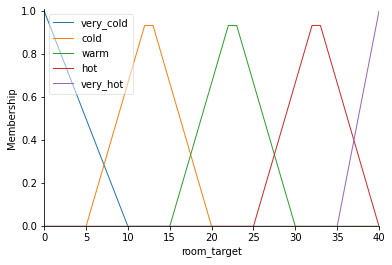

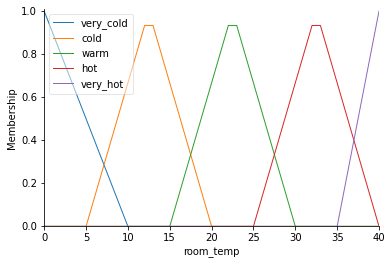

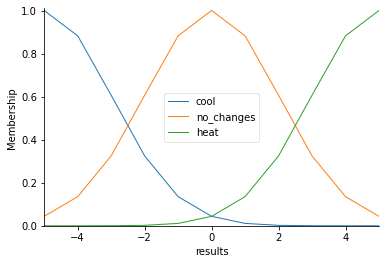

In [13]:
room_target.view()
room_temp.view()
results.view()

In [15]:
rule01 = ctrl.Rule(room_target["very_cold"] & room_temp["very_hot"], results["cool"])
rule02 = ctrl.Rule(room_target["very_cold"] & room_temp["hot"], results["cool"])
rule03 = ctrl.Rule(room_target["very_cold"] & room_temp["warm"], results["cool"])
rule04 = ctrl.Rule(room_target["very_cold"] & room_temp["cold"], results["cool"])
rule05 = ctrl.Rule(room_target["very_cold"] & room_temp["very_cold"], results["no_changes"])

rule11 = ctrl.Rule(room_target["cold"] & room_temp["very_hot"], results["cool"])
rule12 = ctrl.Rule(room_target["cold"] & room_temp["hot"], results["cool"])
rule13 = ctrl.Rule(room_target["cold"] & room_temp["warm"], results["cool"])
rule14 = ctrl.Rule(room_target["cold"] & room_temp["cold"], results["no_changes"])
rule15 = ctrl.Rule(room_target["cold"] & room_temp["very_cold"], results["heat"])

rule21 = ctrl.Rule(room_target["warm"] & room_temp["very_hot"], results["cool"])
rule22 = ctrl.Rule(room_target["warm"] & room_temp["hot"], results["cool"])
rule23 = ctrl.Rule(room_target["warm"] & room_temp["warm"], results["no_changes"])
rule24 = ctrl.Rule(room_target["warm"] & room_temp["cold"], results["heat"])
rule25 = ctrl.Rule(room_target["warm"] & room_temp["very_cold"], results["heat"])

rule31 = ctrl.Rule(room_target["hot"] & room_temp["very_hot"], results["cool"])
rule32 = ctrl.Rule(room_target["hot"] & room_temp["hot"], results["no_changes"])
rule33 = ctrl.Rule(room_target["hot"] & room_temp["warm"], results["heat"])
rule34 = ctrl.Rule(room_target["hot"] & room_temp["cold"], results["heat"])
rule35 = ctrl.Rule(room_target["hot"] & room_temp["very_cold"], results["heat"])

rule41 = ctrl.Rule(room_target["very_hot"] & room_temp["very_hot"], results["no_changes"])
rule42 = ctrl.Rule(room_target["very_hot"] & room_temp["hot"], results["heat"])
rule43 = ctrl.Rule(room_target["very_hot"] & room_temp["warm"], results["heat"])
rule44 = ctrl.Rule(room_target["very_hot"] & room_temp["cold"], results["heat"])
rule45 = ctrl.Rule(room_target["very_hot"] & room_temp["very_cold"], results["heat"])

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

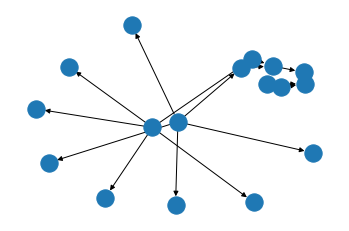

In [16]:
rule01.view()

In [17]:
tipping_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])

In [18]:
results_ctrl = ctrl.ControlSystem([rule01, rule02, rule03, rule04, rule05,
                                   rule11, rule12, rule13, rule14, rule15,
                                   rule21, rule22, rule23, rule24, rule25,
                                   rule31, rule32, rule33, rule34, rule35,
                                   rule41, rule42, rule43, rule44, rule45])

In [19]:
tipping = ctrl.ControlSystemSimulation(tipping_ctrl)

In [20]:
resulting = ctrl.ControlSystemSimulation(results_ctrl)

In [21]:
# Pass inputs to the ControlSystem using Antecedent labels with Pythonic API
# Note: if you like passing many inputs all at once, use .inputs(dict_of_data)
tipping.input['quality'] = 6.5
tipping.input['service'] = 9.8

In [22]:
resulting.input["room_target"] = 22
resulting.input["room_temp"] = 31

In [23]:
# Crunch the numbers
tipping.compute()

In [24]:
resulting.compute()

20.988505128608086


c:\Users\adams\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


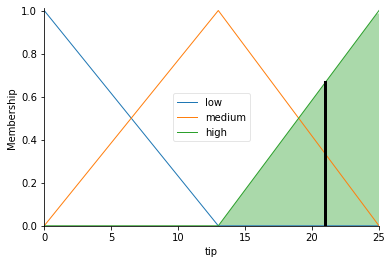

In [25]:
print(tipping.output['tip'])
tip.view(sim=tipping)

-3.2967424051467775


c:\Users\adams\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


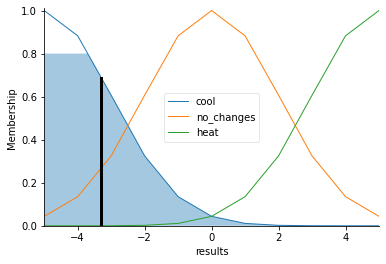

In [26]:
print(resulting.output["results"])
results.view(sim = resulting)